# Analysis of Poon's pain relief medications in the Hong Kong market

### Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import scipy.stats as stats
import re
from tabulate import tabulate

### Part 1. Probability distribution of Ratings for Poon's products

Total cases observed: 105708


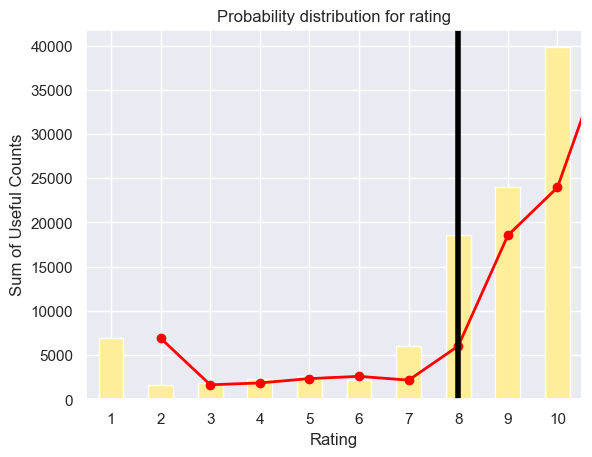

Poon's rating is 8, based on the basic reviews observed in the HK market.
Due to the great level of similarity between products in this market, it is evident that Poon's has to improve their product in a certain way, be it ingredients, or concentration of ingredients which can enable its rating to improve to a 9-10 range, where we see a great number of products lie


In [60]:
# Loading dataset
df = pd.read_csv('drugsComTest_raw.csv')

# Probabaility distribution for ratings

# Carry out data-cleaning by filtering out medication relevant to the project, and grouping accordingly
filtered_df = df[df['condition'].str.contains('pain' or 'joint' or 'muscle', case=False, na = False)]

# Further modify the filtered database by making it easier to use for the objective
new_df = filtered_df[['rating','usefulCount']]
grouped_df = new_df.groupby('rating')['usefulCount'].sum()

# Calculate the number of observed cases to show how reliable findings are
s = 0
for name,count in grouped_df.items():
    s += count
print(f"Total cases observed: {s}")

# Plot the distribution to show Poon's medicine rating
grouped_df.plot(kind='bar', x='rating', y='usefulCount', color = '#FFEE99')
grouped_df.plot(kind='line', x='rating', y='usefulCount', color='red', linewidth=2, marker='o')
plt.axvline(x=7, color='black', linestyle='-', linewidth=4)
plt.xlabel('Rating')
plt.ylabel('Sum of Useful Counts')
plt.title('Probability distribution for rating')
plt.show()

print("Poon's rating is 8, based on the basic reviews observed in the HK market.\nDue to the great level of similarity between products in this market, it is evident that Poon's has to improve their product in a certain way, be it ingredients, or concentration of ingredients which can enable its rating to improve to a 9-10 range, where we see a great number of products lie")

### Part 2. Identify the Gender Ratio of Customers and Satisfaction Level

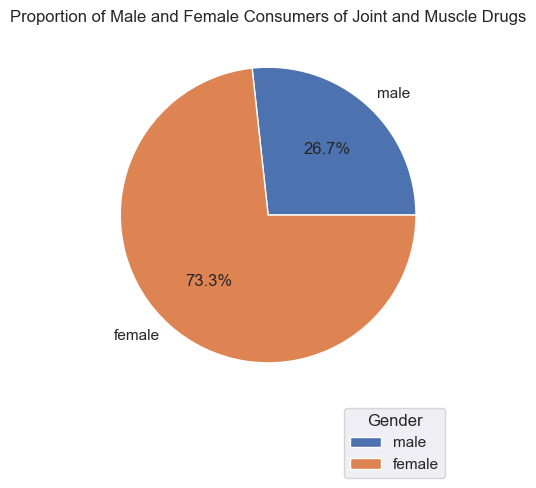

In [61]:
df2 = pd.read_csv('webmd.csv')
filtered_data = df2[df2['Condition'].str.contains('joint|muscle', case=False, na=False)]
pain_data = filtered_data.dropna(subset=['Sex'])

# Plot the distribution Poon's customer genders

gender_counts = pain_data.groupby('Sex').size()
male_consumers = gender_counts['Male']
female_consumers = gender_counts['Female']
total_consumers = male_consumers + female_consumers

proportion_male = male_consumers / total_consumers
proportion_female = female_consumers / total_consumers
proportions = [proportion_male, proportion_female]
labels = ["male", "female"]
plt.pie(proportions, labels=labels, autopct='%1.1f%%')
plt.legend(title='Gender', bbox_to_anchor=(1,0), loc='upper right')
plt.title('Proportion of Male and Female Consumers of Joint and Muscle Drugs')
plt.show()

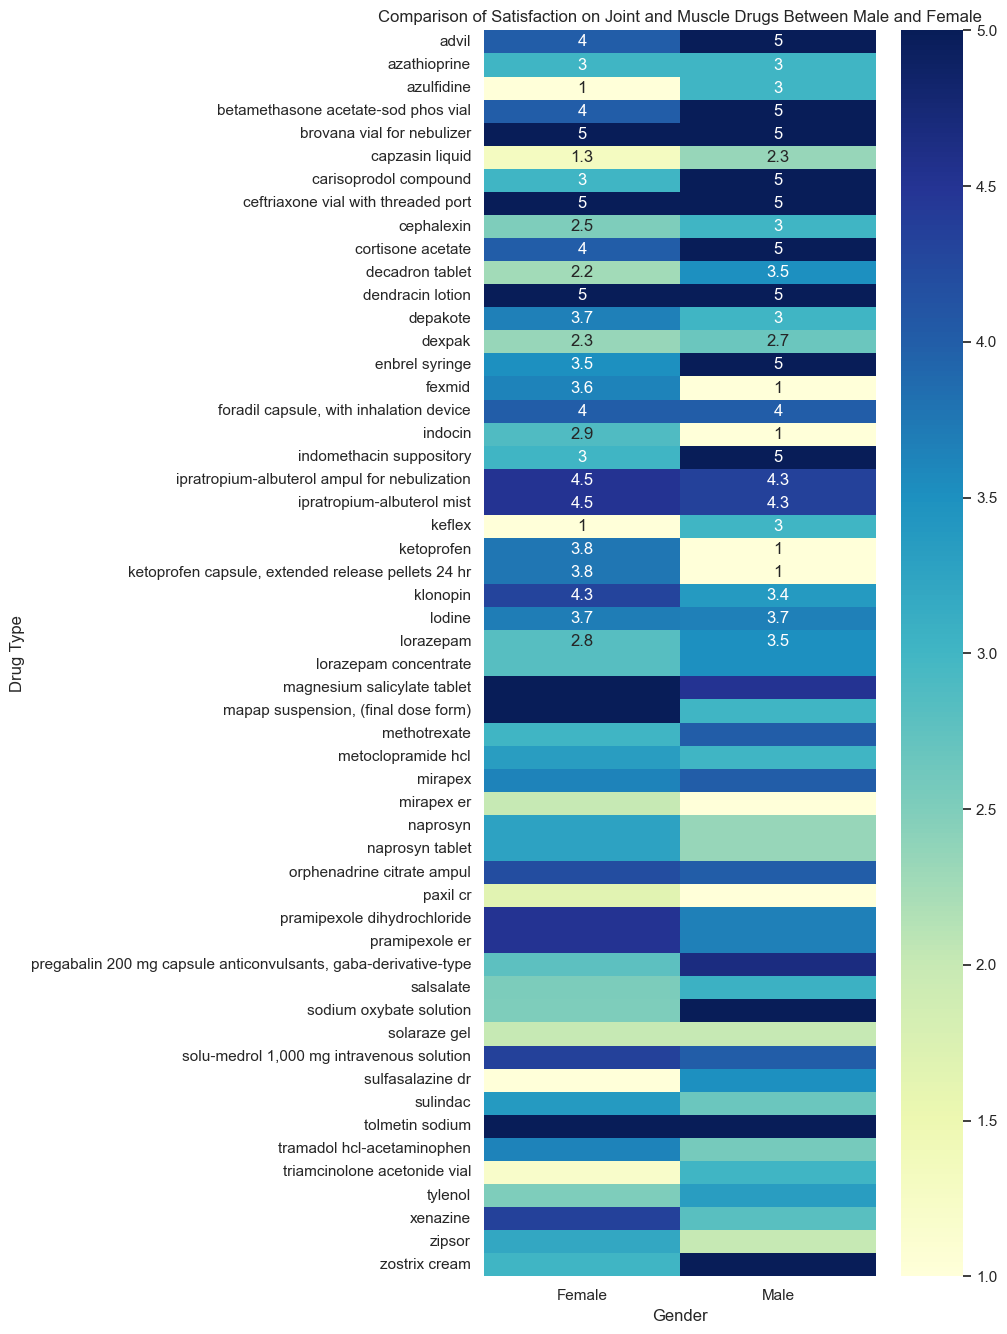

In [62]:
# Plot the heat map to show the distribution of customer ratings by gender

# only consider pain for joint and muscle conditions
def pain_conditions(df2):
    filtered_df = df2[df2['Condition'].str.contains('joint|muscle', case=False)]
    return filtered_df

# drop null values in sex and satisfaction
def drop_null_values(df2):
    cleaned_df = df2.dropna(subset=['Sex', 'Satisfaction'])
    return cleaned_df

# only consider pain drug with satisfaction values for both male and female
def pain_drugs(df2):
    grouped_df = df2.groupby('Drug')
    pain_drugs = []
    for name, group in grouped_df:
        if set(group['Sex']) == {'Male', 'Female'} and len(group) > 1:
            pain_drugs.append(name)
    filtered_df = df2[df2['Drug'].isin(pain_drugs)]
    return filtered_df

def create_heatmap(df2):
    pivot_df = df2.pivot_table(index='Drug', columns='Sex', values='Satisfaction')
    font_size = 10
    figure_height = len(pivot_df) * (font_size / 40)
    sns.set(font_scale=font_size / 10)
    plt.figure(figsize=(10, figure_height))
    
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
    plt.title('Comparison of Satisfaction on Joint and Muscle Drugs Between Male and Female')
    plt.xlabel('Gender')
    plt.ylabel('Drug Type')
    plt.tight_layout()
    plt.show()

df2 = pd.read_csv('webmd.csv')
df2 = pain_conditions(df2)
df2 = drop_null_values(df2)
df2 = pain_drugs(df2)
create_heatmap(df2)

### Part 3. Analysing Impact of Retailing Prices on Customer Satisfaction

In [63]:
data = pd.read_csv('Drug_clean.csv')

# Define the specific wanted categories
wanted_categories = ['pain', 'gout']

# Filter data for the wanted categories
filtered_data = data[data['Condition'].isin(wanted_categories)]

new_data = filtered_data[['Drug', 'EaseOfUse', 'Effective', 'Price', 'Reviews', 'Satisfaction']]

stat_price = new_data['Price'].describe()
stat_reviews = new_data['Reviews'].describe()
new_data = new_data[new_data['Price'] <= 500]
new_data = new_data[new_data['Reviews'] <= 600]

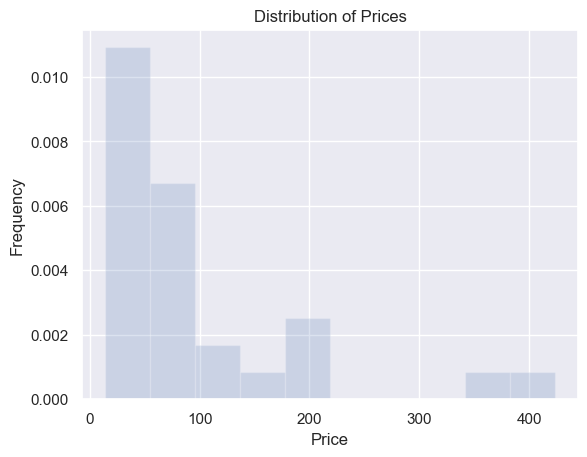

In [64]:
# Plot a histogram of prices

plt.hist(new_data['Price'], bins=10, density=True, alpha=0.2)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')

# Fit a normal distribution curve to the data
mu, sigma = new_data['Price'].mean(), new_data['Price'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)

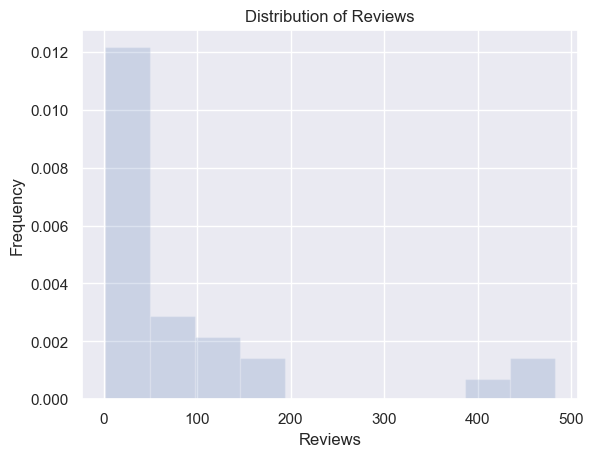

In [65]:
# Plot a histogram of Reviews

plt.hist(new_data['Reviews'], bins=10, density=True, alpha=0.2)
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Reviews')

# Fit a normal distribution curve to the data
mu, sigma = new_data['Reviews'].mean(), new_data['Reviews'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)

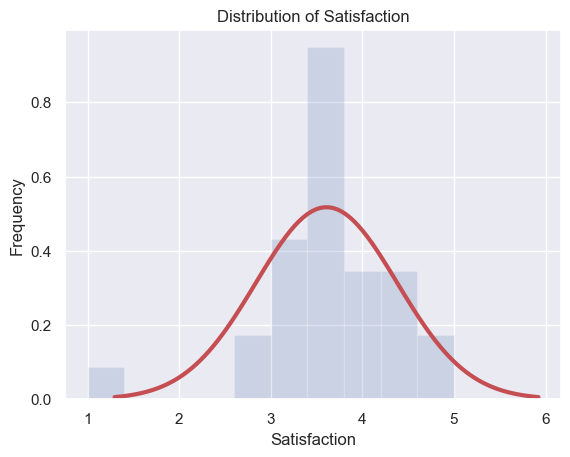

In [66]:
# Plot a histogram of Satisfaction

plt.hist(new_data['Satisfaction'], bins=10, density=True, alpha=0.2)
plt.xlabel('Satisfaction')
plt.ylabel('Frequency')
plt.title('Distribution of Satisfaction')

# Fit a normal distribution curve to the data
mu, sigma = new_data['Satisfaction'].mean(), new_data['Satisfaction'].std()
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', linewidth=3)

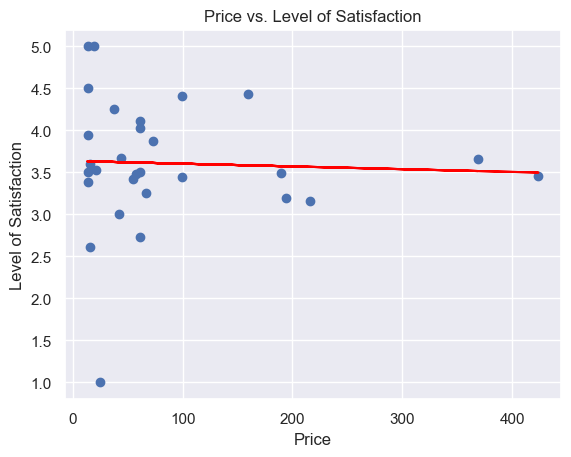

Correlation Coefficient: -0.04364656470938452


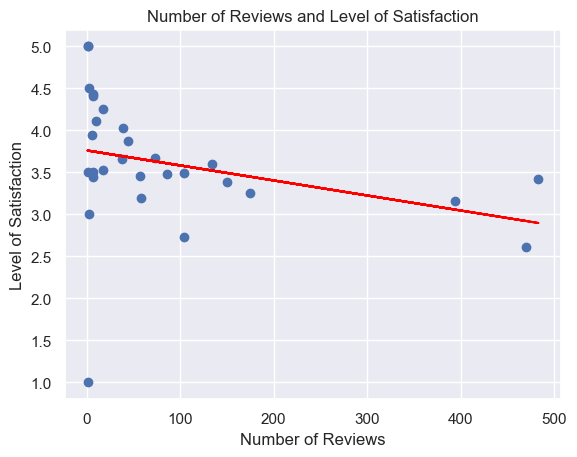

Correlation Coefficient: -0.313850602055975


In [67]:
plt.scatter(new_data['Price'], new_data['Satisfaction'], label = 'Satisfaction')
plt.xlabel('Price')
plt.ylabel('Level of Satisfaction')
plt.title('Price vs. Level of Satisfaction')

# Obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(new_data['Price'], new_data['Satisfaction'], 1)

# Add linear regression line to scatterplot
plt.plot(new_data['Price'], m*new_data['Price']+b, color='red')
plt.show()

# Calculate the correlation
correlation = new_data['Price'].corr(new_data['Satisfaction'])
print("Correlation Coefficient:", correlation)

# Satisfaction and Reviews
plt.scatter(new_data['Reviews'], new_data['Satisfaction'])
plt.xlabel('Number of Reviews')
plt.ylabel('Level of Satisfaction')
plt.title('Number of Reviews and Level of Satisfaction')
m, b = np.polyfit(new_data['Reviews'], new_data['Satisfaction'], 1)
# Add linear regression line to scatterplot
plt.plot(new_data['Reviews'], m*new_data['Reviews']+b, color='red')
plt.show()

# Calculate the correlation
correlation = new_data['Reviews'].corr(new_data['Satisfaction'])
print("Correlation Coefficient:", correlation)

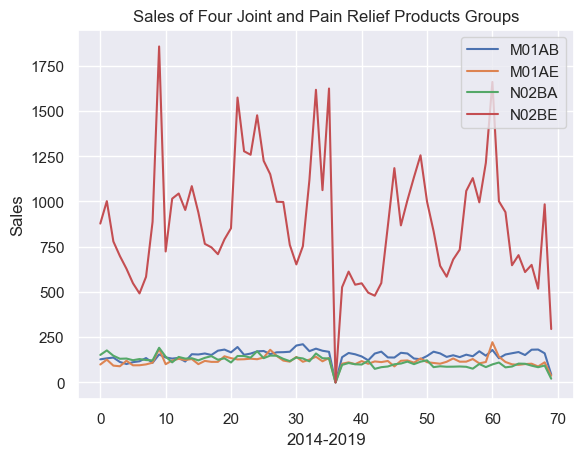

In [68]:
#  Sales of Four Joint and Pain Relief Product Groups

sales = pd.read_csv('salesmonthly.csv')

# Plot line graph

plt.plot(sales['M01AB']); plt.plot(sales['M01AE'])
plt.plot(sales['N02BA']); plt.plot(sales['N02BE'])
plt.xlabel('2014-2019')
plt.ylabel('Sales')
plt.title('Sales of Four Joint and Pain Relief Products Groups')
plt.legend(["M01AB", "M01AE","N02BA","N02BE"])
plt.show()